In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [35]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [36]:
asset = 'BTC' 
freq = '1min'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('min')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading BTC from ../dataset/BTC_1min.csv
BTC: 17113 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:34:00+00:00,2021-04-07 11:33:41.122161+00:00,55896.285000,0.010000,4448599.182456,3899402.119931,-0.000000,-0.000065,-0.000073,-0.000154,-0.000162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1176.729980,0.000000
2021-04-07 11:35:00+00:00,2021-04-07 11:34:41.122161+00:00,55948.685000,1.430000,1243243.955359,3606502.237891,-0.000013,-0.000013,-0.000242,-0.000242,-0.000259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:36:00+00:00,2021-04-07 11:35:41.122161+00:00,56013.785000,0.010000,3069093.672892,1575759.392947,-0.000000,-0.000009,-0.000070,-0.000088,-0.000173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [37]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [38]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 908275 total (34.242%)


But there are a lot of Zero values

In [39]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 39 total (0.004%)


bids_notional_0    19
asks_notional_0    12
bids_notional_8     2
bids_notional_3     1
bids_notional_6     1
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [40]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 468047 total (91.168%)


bids_market_notional_14    16697
bids_market_notional_12    16654
bids_market_notional_13    16641
bids_market_notional_11    16621
bids_market_notional_10    16609
asks_market_notional_14    16573
asks_market_notional_13    16559
bids_market_notional_8     16557
bids_market_notional_9     16548
asks_market_notional_12    16505
bids_market_notional_6     16485
bids_market_notional_7     16473
asks_market_notional_11    16440
asks_market_notional_10    16402
asks_market_notional_9     16393
bids_market_notional_5     16359
asks_market_notional_8     16347
asks_market_notional_7     16315
bids_market_notional_4     16238
asks_market_notional_6     16192
bids_market_notional_3     16078
asks_market_notional_5     16066
asks_market_notional_4     15971
bids_market_notional_2     15905
asks_market_notional_3     15777
bids_market_notional_1     15532
asks_market_notional_2     15517
asks_market_notional_1     14929
bids_market_notional_0      7849
asks_market_notional_0      4815
dtype: int

In [41]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 414372 total (80.713%)


bids_cancel_notional_14    14953
bids_cancel_notional_13    14900
bids_cancel_notional_12    14877
bids_cancel_notional_11    14818
bids_cancel_notional_10    14816
asks_cancel_notional_14    14785
asks_cancel_notional_13    14782
asks_cancel_notional_11    14728
bids_cancel_notional_9     14721
asks_cancel_notional_12    14711
asks_cancel_notional_10    14690
asks_cancel_notional_9     14685
asks_cancel_notional_7     14609
bids_cancel_notional_8     14589
asks_cancel_notional_8     14571
bids_cancel_notional_7     14545
bids_cancel_notional_6     14468
asks_cancel_notional_6     14447
asks_cancel_notional_5     14364
bids_cancel_notional_5     14324
asks_cancel_notional_4     14207
bids_cancel_notional_4     14075
asks_cancel_notional_3     13907
asks_cancel_notional_2     13769
bids_cancel_notional_3     13539
asks_cancel_notional_1     13288
bids_cancel_notional_2     13265
bids_cancel_notional_1     13025
asks_cancel_notional_0      6176
bids_cancel_notional_0      5738
dtype: int

In [42]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 25817 total (5.029%)


asks_limit_notional_14    1369
asks_limit_notional_12    1334
asks_limit_notional_13    1276
asks_limit_notional_10    1219
asks_limit_notional_11    1203
asks_limit_notional_9     1187
asks_limit_notional_8     1155
asks_limit_notional_6     1123
asks_limit_notional_7     1119
asks_limit_notional_4     1052
asks_limit_notional_5     1048
asks_limit_notional_3     1021
asks_limit_notional_2      910
bids_limit_notional_14     908
bids_limit_notional_13     876
bids_limit_notional_12     862
bids_limit_notional_11     768
bids_limit_notional_10     750
bids_limit_notional_9      717
asks_limit_notional_1      704
bids_limit_notional_8      689
bids_limit_notional_5      685
bids_limit_notional_6      674
bids_limit_notional_7      663
bids_limit_notional_4      661
bids_limit_notional_3      602
bids_limit_notional_2      521
bids_limit_notional_1      473
asks_limit_notional_0      167
bids_limit_notional_0       81
dtype: int64

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include just a few zero values.

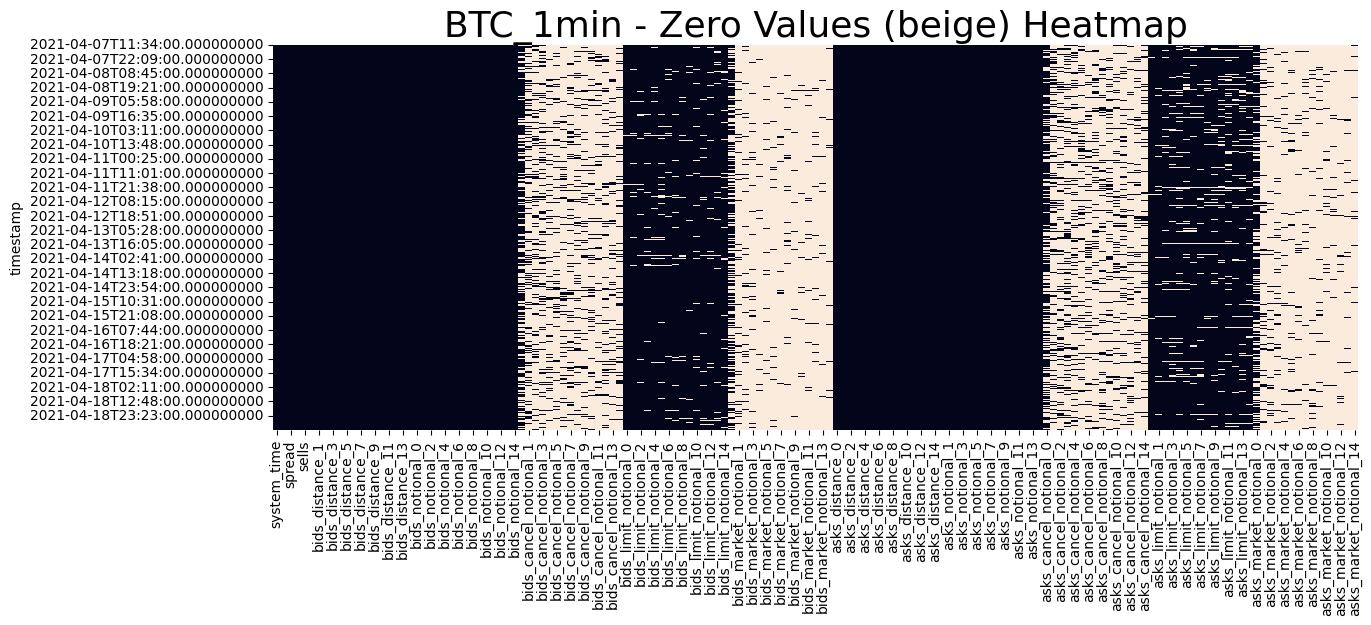

In [43]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

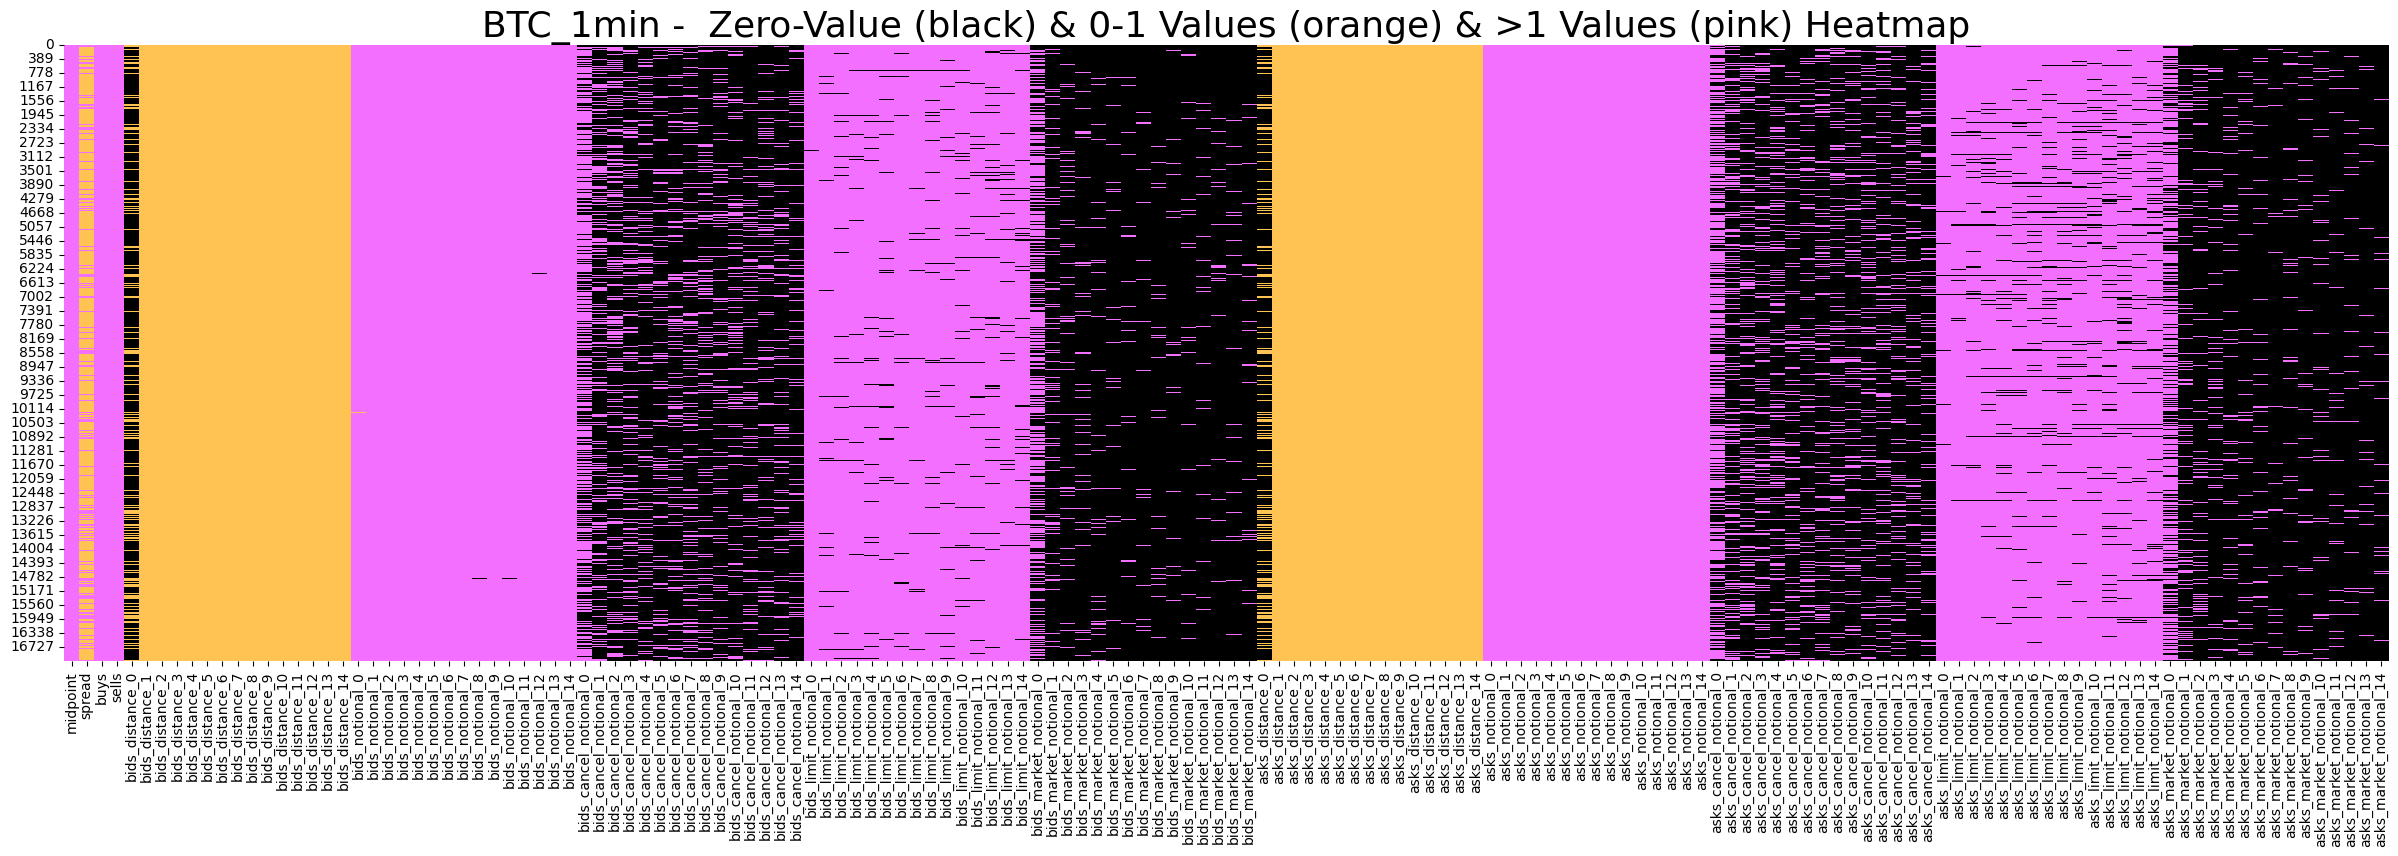

In [44]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [45]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,17113.000000,59974.016782,2489.942801,52430.650000,58000.005000,60147.065000,62182.485000,64858.995000
spread,17113.000000,1.293919,4.001627,0.010000,0.010000,0.010000,0.010000,160.360000
buys,17113.000000,337889.366375,525614.065037,1542.180273,88175.764868,184809.968182,387477.362482,11430561.565791
sells,17113.000000,294067.095996,626885.001526,130.460606,56216.738495,133135.532895,314326.204726,24612794.974624
bids_distance_0,17113.000000,-0.000011,0.000035,-0.001472,-0.000000,-0.000000,-0.000000,-0.000000
bids_distance_1,17113.000000,-0.000047,0.000063,-0.001483,-0.000070,-0.000028,-0.000003,-0.000000
bids_distance_2,17113.000000,-0.000078,0.000076,-0.001596,-0.000107,-0.000061,-0.000026,-0.000000
bids_distance_3,17113.000000,-0.000104,0.000087,-0.001597,-0.000141,-0.000086,-0.000044,-0.000001
bids_distance_4,17113.000000,-0.000128,0.000097,-0.001625,-0.000170,-0.000108,-0.000062,-0.000001
bids_distance_5,17113.000000,-0.000151,0.000106,-0.002438,-0.000198,-0.000132,-0.000081,-0.000001


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

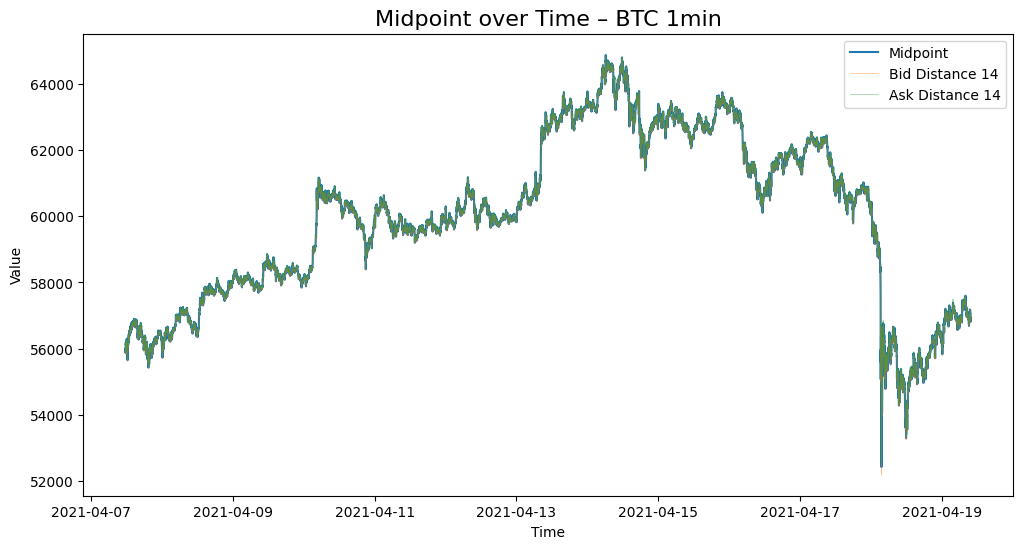

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

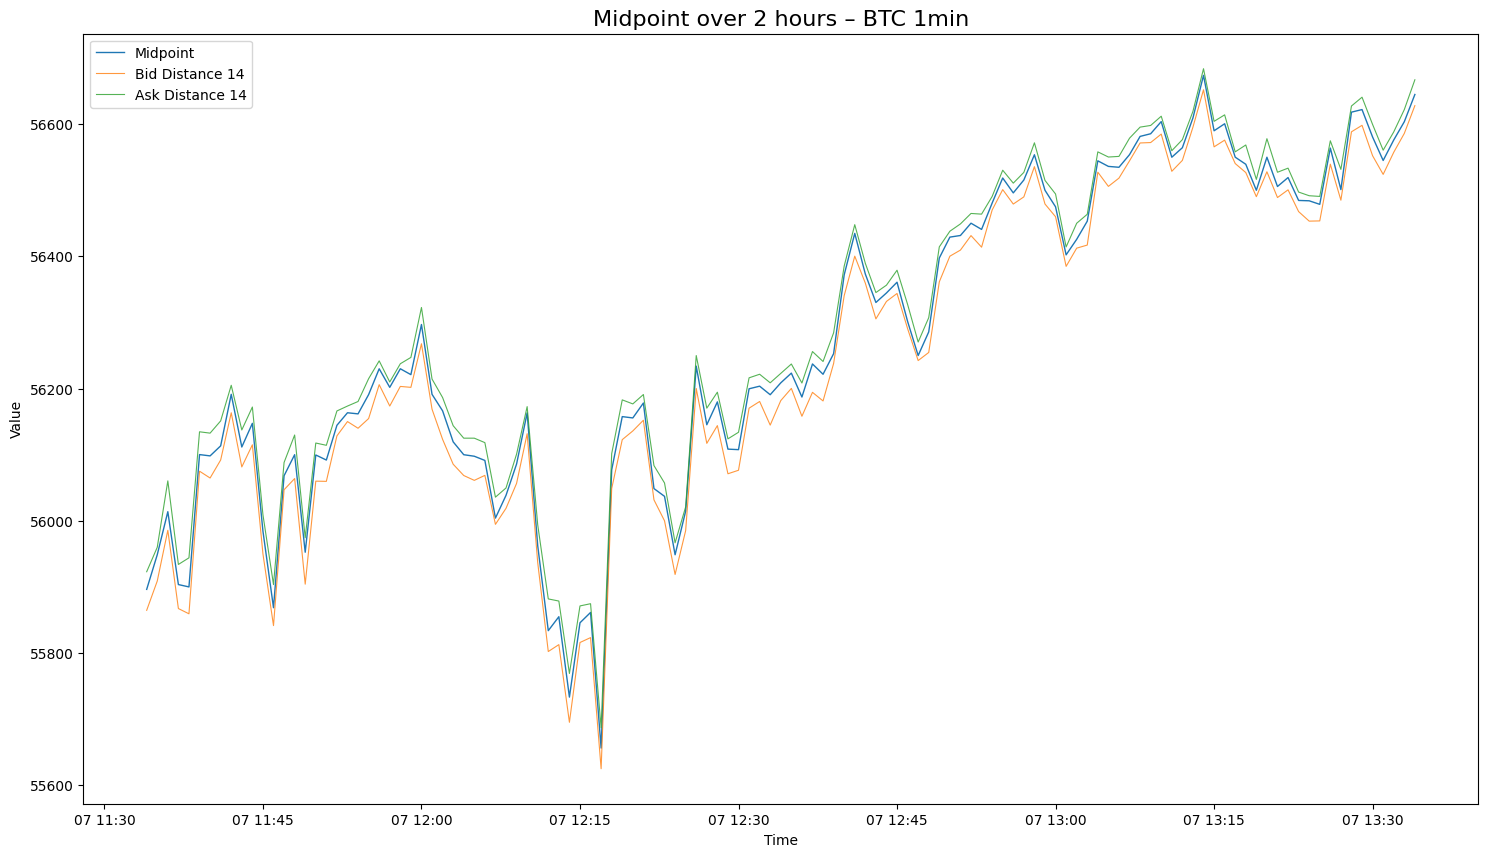

In [47]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [48]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
system_time,2021-04-07 11:33:41.122161+00:00,2021-04-07 11:34:41.122161+00:00,2021-04-07 11:35:41.122161+00:00
midpoint,55896.285,55948.685,56013.785
spread,0.01,1.43,0.01
buys,4448599.182456,1243243.955359,3069093.672892
sells,3899402.119931,3606502.237891,1575759.392947
bids_distance_0,-0.0,-0.000013,-0.0
bids_distance_1,-0.000065,-0.000013,-0.000009
bids_distance_2,-0.000073,-0.000242,-0.00007
bids_distance_3,-0.000154,-0.000242,-0.000088
bids_distance_4,-0.000162,-0.000259,-0.000173


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [49]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
bids_distance_0,-0.0,-0.000013,-0.0
bids_notional_0,714.909973,2797.399902,95037.171875
bids_cancel_notional_0,0.0,0.0,0.0
bids_limit_notional_0,714.909973,2797.399902,95037.171875
bids_market_notional_0,0.0,0.0,0.0
asks_distance_0,0.0,0.000013,0.0
asks_notional_0,773.450012,6982.200195,3.04
asks_cancel_notional_0,0.0,0.0,0.0
asks_limit_notional_0,1185.0,8392.410156,2479.409912
asks_market_notional_0,411.549988,1410.209961,2476.370117


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [50]:
print(f'{asset} {freq} shape:', df.shape)

BTC 1min shape: (17113, 155)


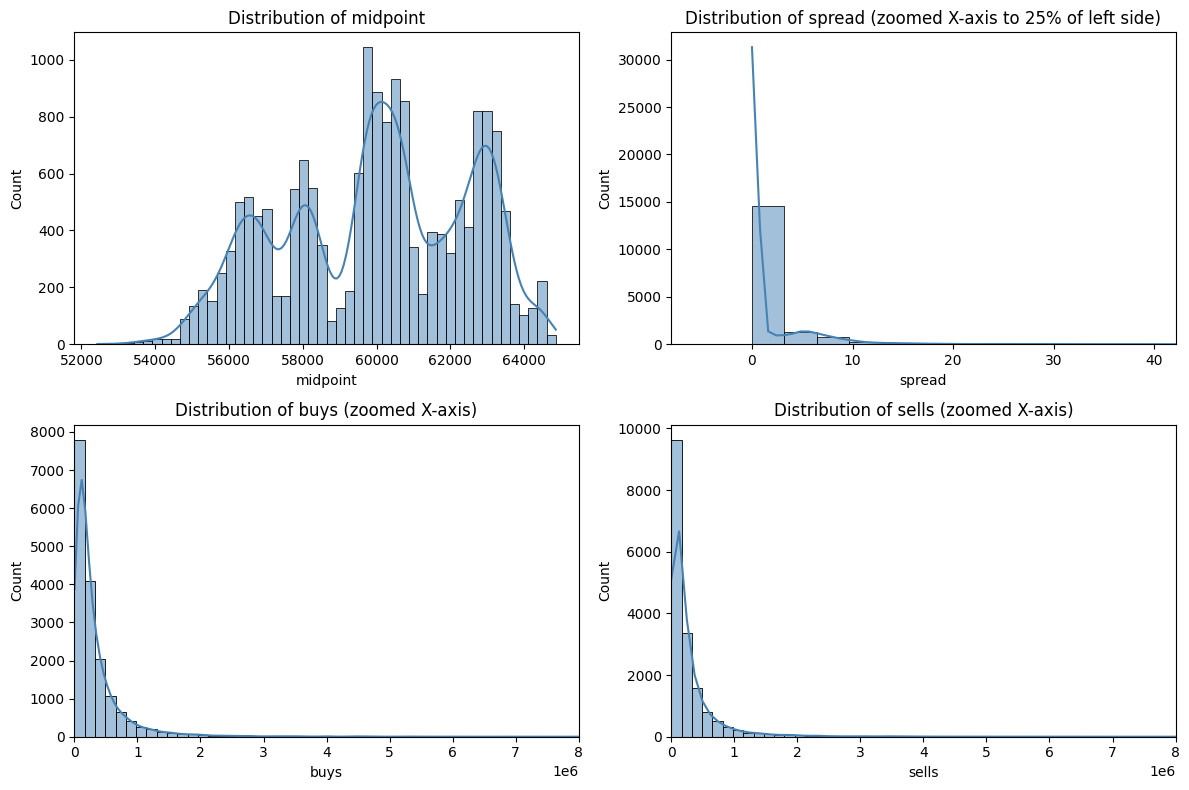

In [51]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=8*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

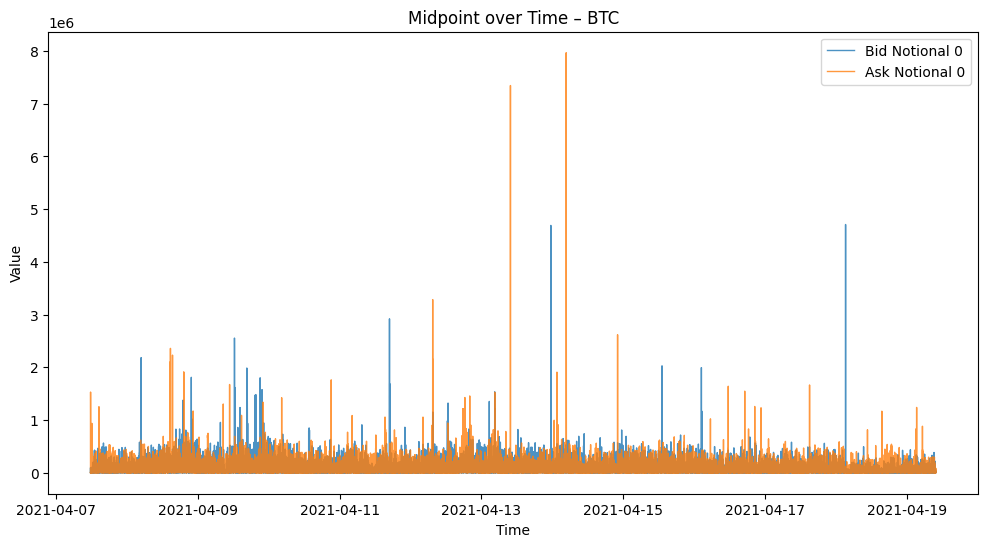

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – BTC')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are some observations of with extreme large values of Bid/Ask notional volumes.

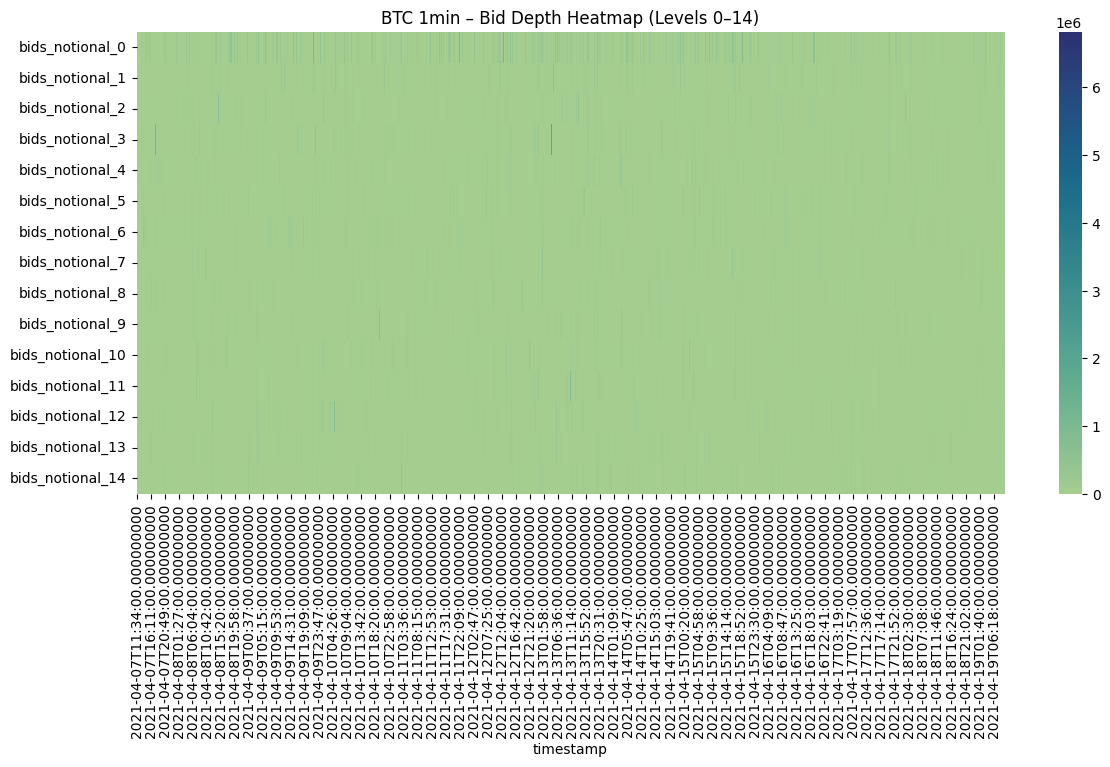

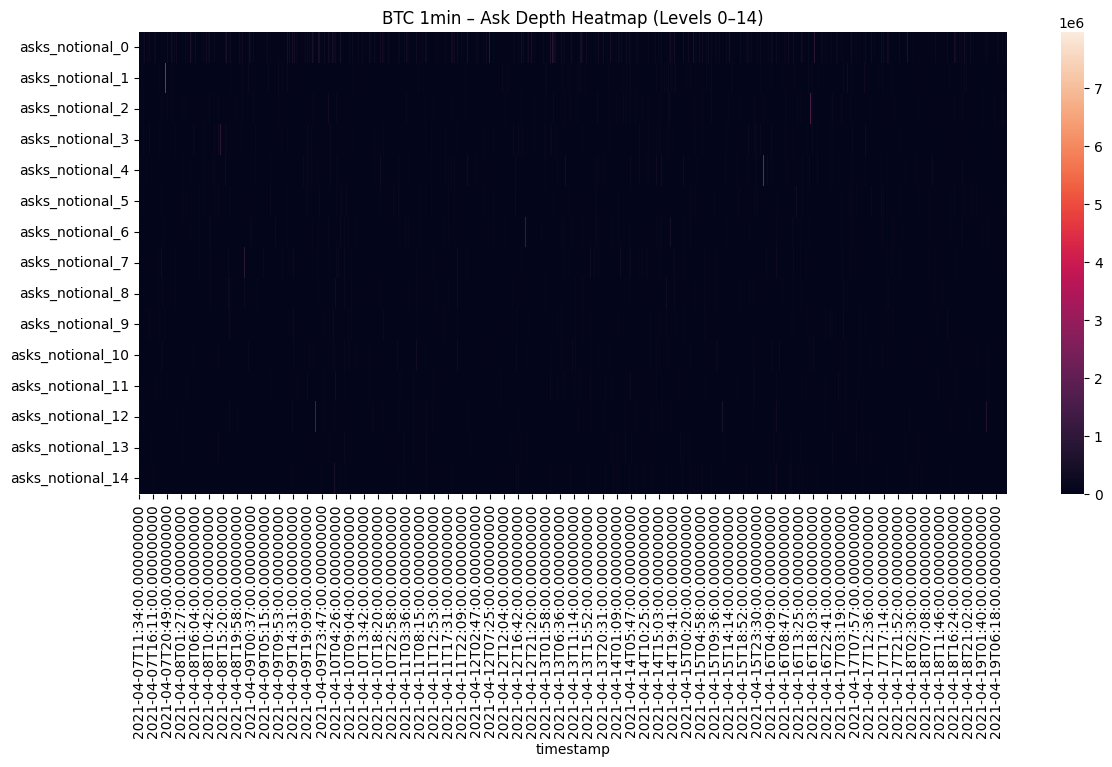

In [53]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14)')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14)')
plt.show()


There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

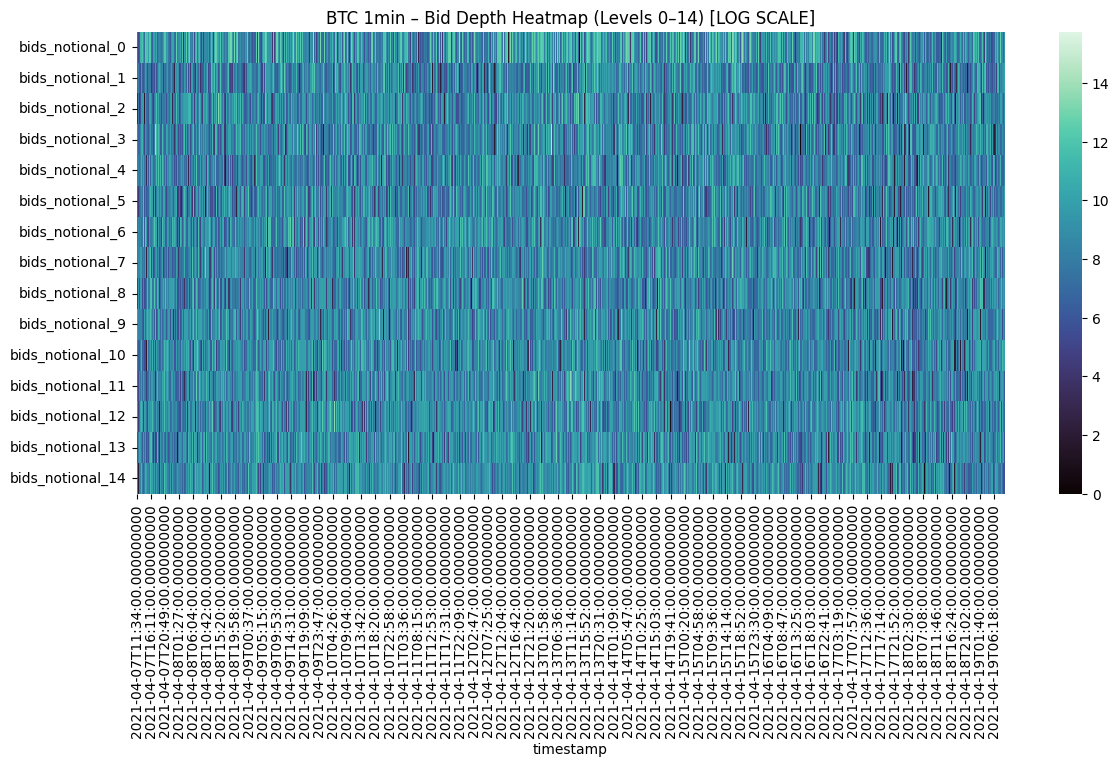

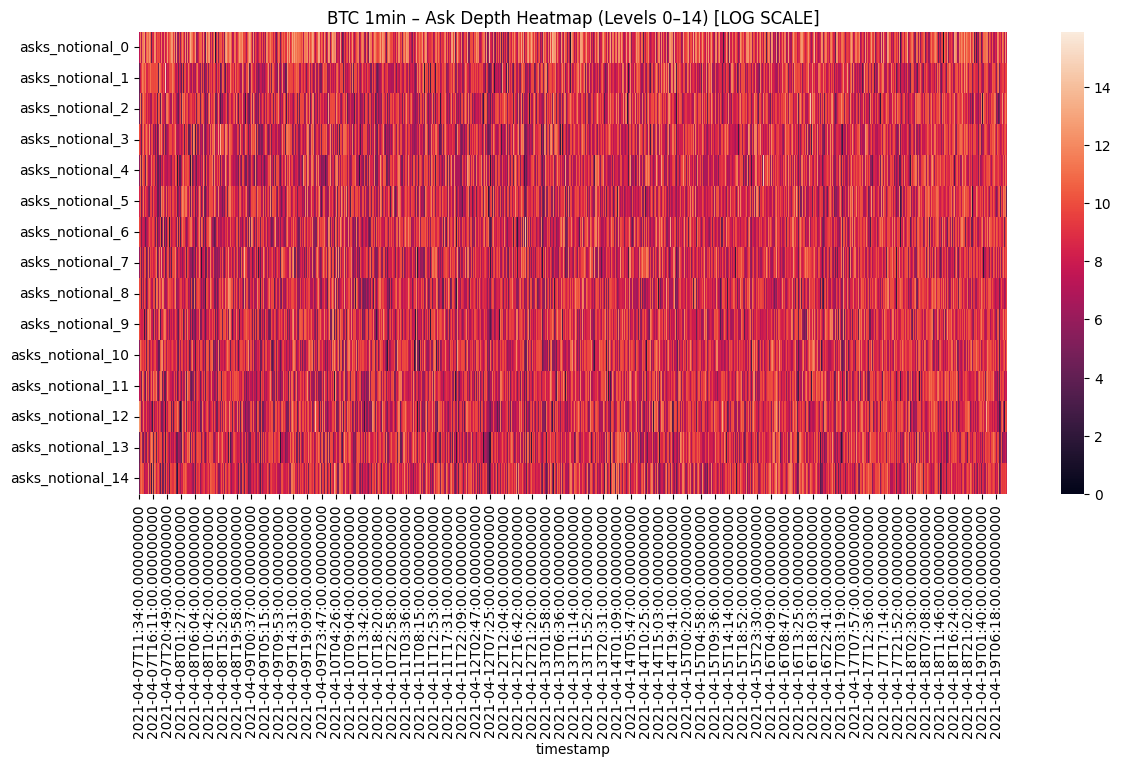

In [54]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

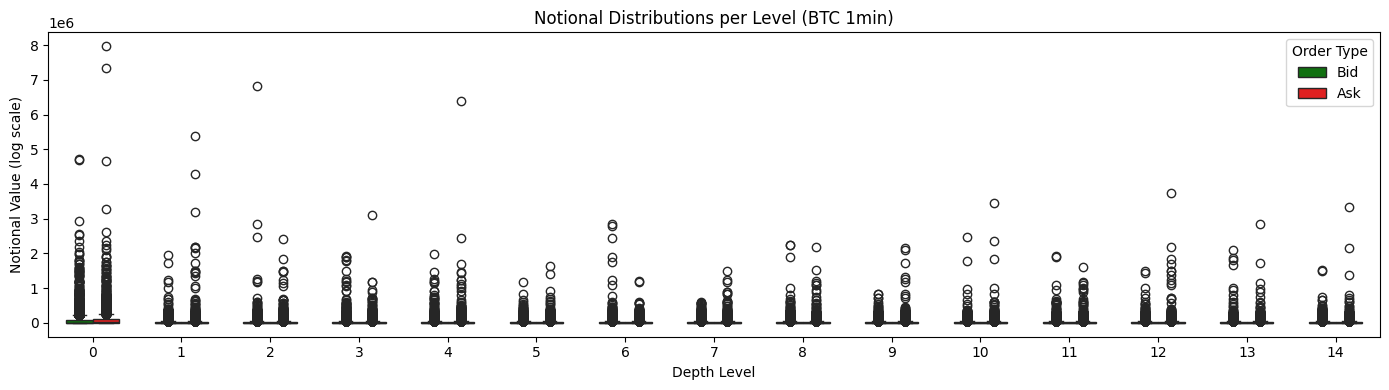

In [55]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level ({} {})'.format(asset, freq))
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

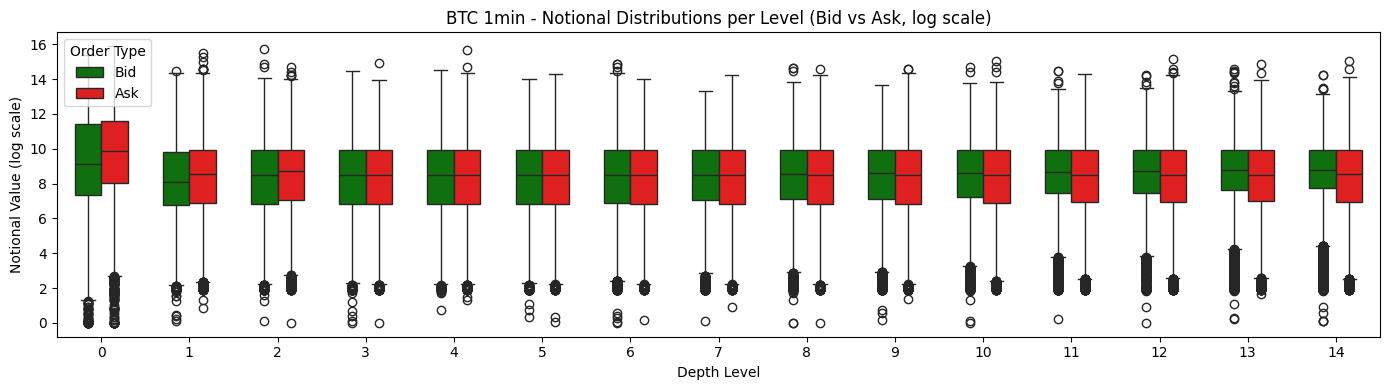

In [56]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

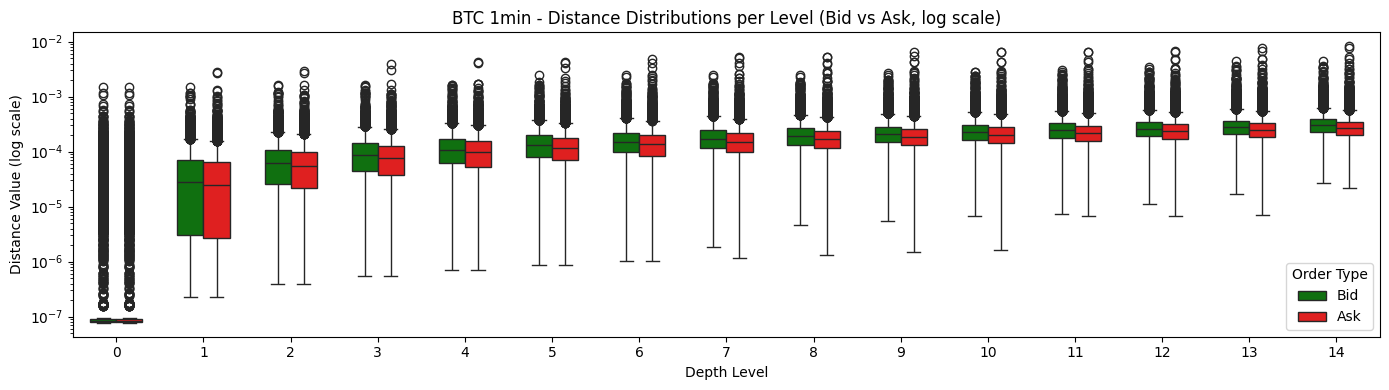

In [57]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

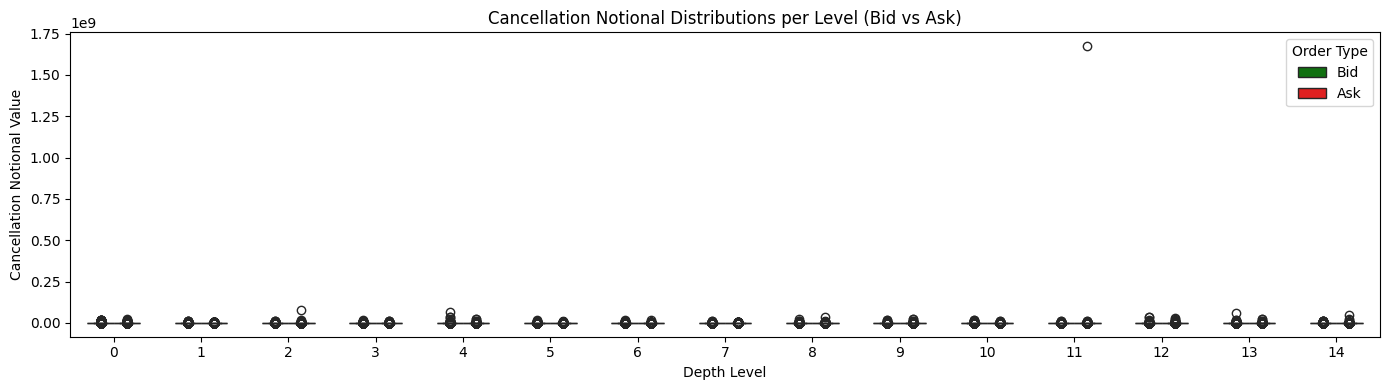

In [58]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [59]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
401239,11,Ask,1.674221e+09


An insane amount of 1 billion in dollars equivalent was canceled on the 13th level. This is the outlier.

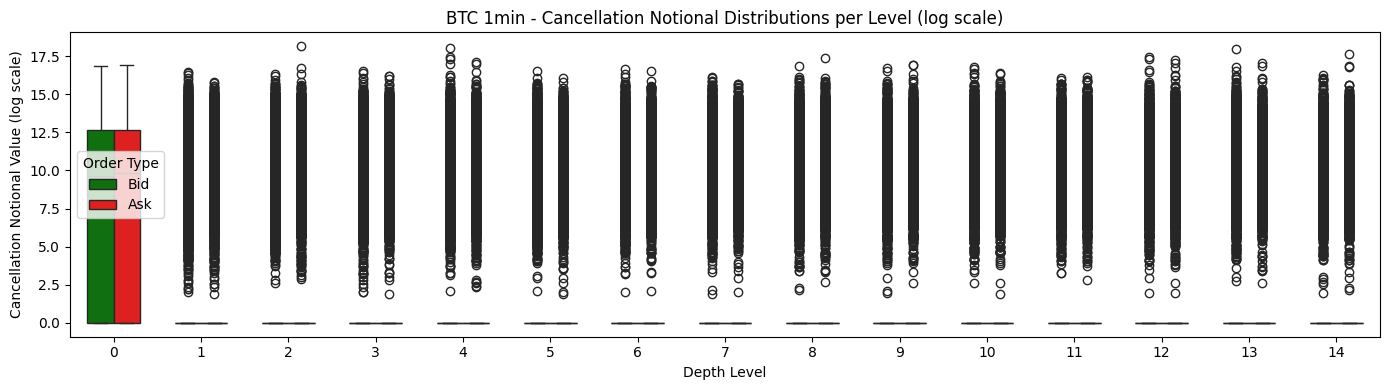

In [60]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value'])] # remove outlier
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, but for low levels the distribution exists.

### Limit Volume

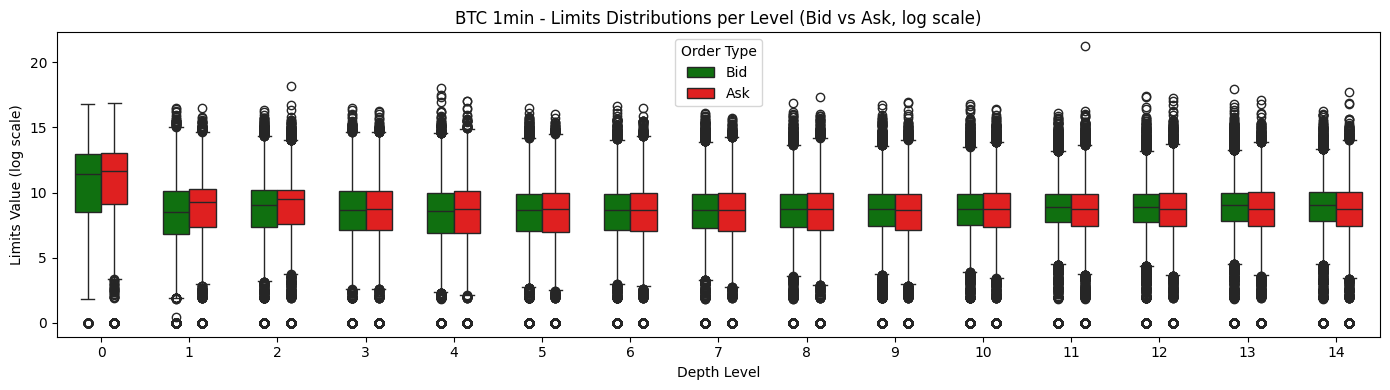

In [61]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

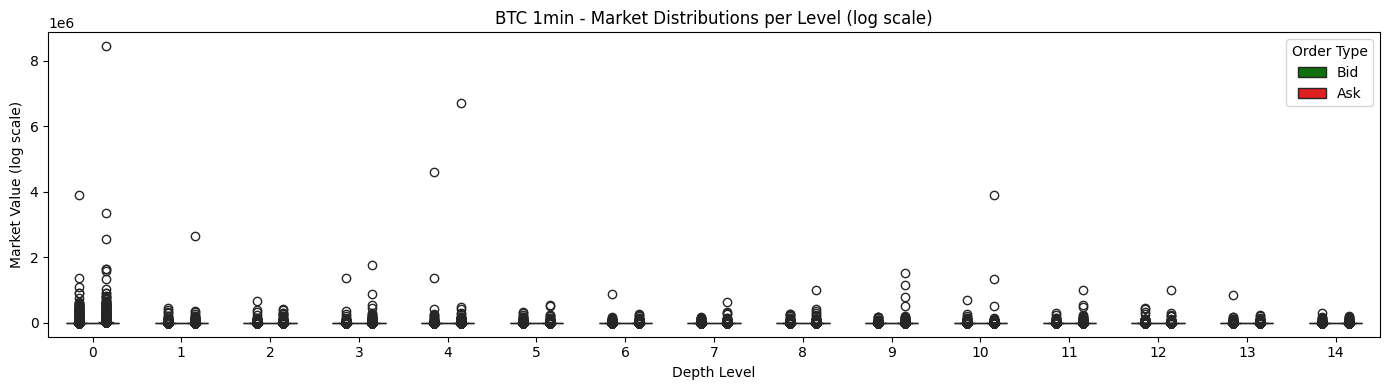

In [62]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [63]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
6054,0,Bid,3905686.00
20985,0,Ask,8437112.00
24042,0,Ask,2554788.75
26744,0,Ask,3347977.50
55203,1,Ask,2640280.75
152191,4,Bid,4601350.50
162427,4,Ask,6713073.00
367876,10,Ask,3902284.75


There are some outliers standing out from the general scope.

In [64]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value']*0.30)]


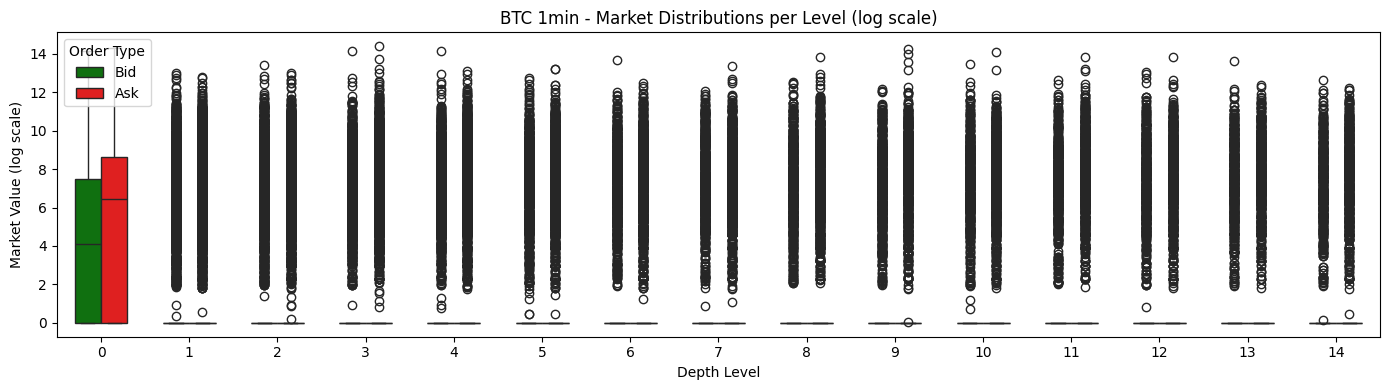

In [65]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

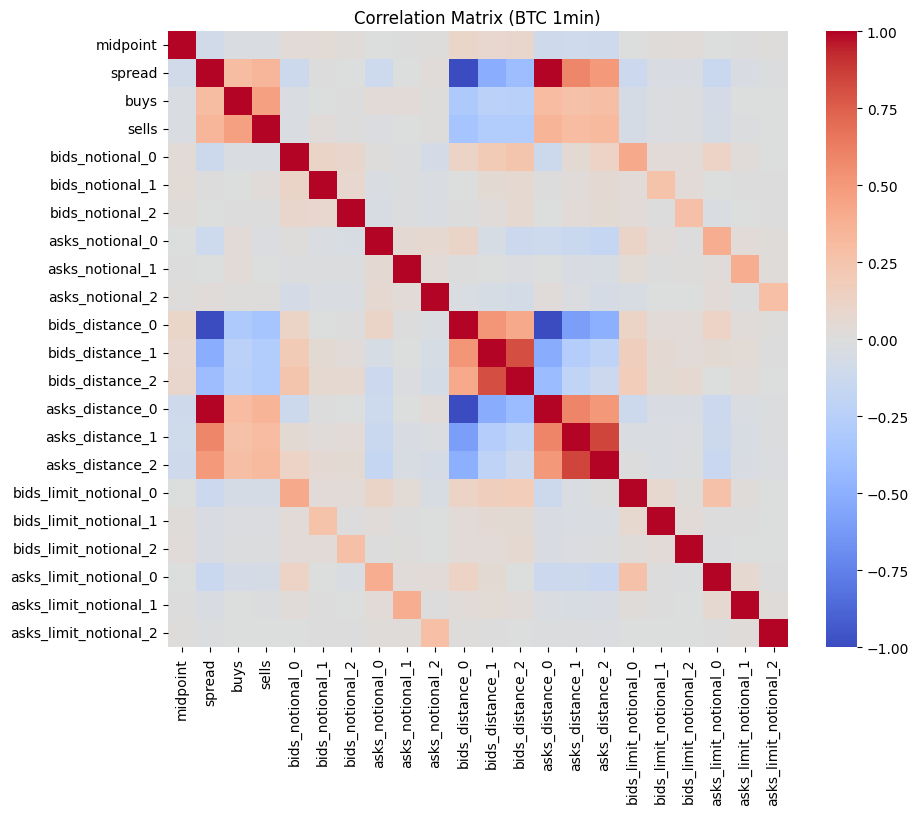

In [66]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.